<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/Recycle_018_Image_All_Recycle_Keras_color_jun_26_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
import zipfile
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [3]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [4]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [5]:
# all images are load in variable x...
Arq =['cardboard.zip','glass.zip','metal.zip','not_recycle.zip',
      'paper.zip','plastic.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [6]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [7]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [8]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [9]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [10]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [11]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_train.append(y[II])

In [12]:
X_test= []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_test.append(y[II])

In [13]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)

In [14]:

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=15, batch_size=32)
print("Returned:", r)

Epoch 1/15
64/64 [==============================] - 19s 29ms/step - loss: 2.3369 - accuracy: 0.3265 - val_loss: 1.7300 - val_accuracy: 0.1739
Epoch 2/15
64/64 [==============================] - 1s 14ms/step - loss: 1.2229 - accuracy: 0.5266 - val_loss: 1.9578 - val_accuracy: 0.2609
Epoch 3/15
64/64 [==============================] - 1s 13ms/step - loss: 1.0875 - accuracy: 0.5836 - val_loss: 1.9277 - val_accuracy: 0.2767
Epoch 4/15
64/64 [==============================] - 1s 13ms/step - loss: 1.0670 - accuracy: 0.6170 - val_loss: 1.8261 - val_accuracy: 0.2846
Epoch 5/15
64/64 [==============================] - 1s 13ms/step - loss: 0.9684 - accuracy: 0.6405 - val_loss: 1.6561 - val_accuracy: 0.3557
Epoch 6/15
64/64 [==============================] - 1s 14ms/step - loss: 0.8733 - accuracy: 0.6825 - val_loss: 1.6028 - val_accuracy: 0.3814
Epoch 7/15
64/64 [==============================] - 1s 15ms/step - loss: 0.8209 - accuracy: 0.6792 - val_loss: 1.7518 - val_accuracy: 0.3617
Epoch 8/15
6

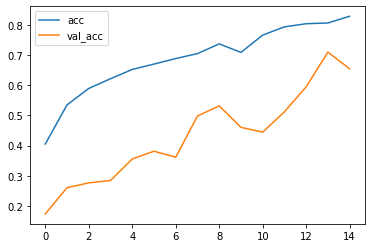

In [16]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

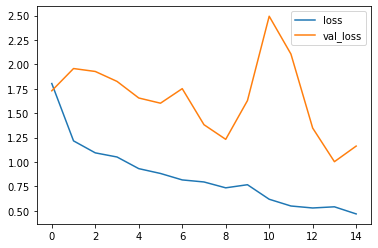

In [17]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()